In [1]:
import pandas as pd
import glob
import matplotlib.pyplot as plt 
import numpy as np
from datetime import datetime, timedelta


In [2]:
path = 'CDC-Cases-Forecast'
all_files = glob.glob(path + "/*.csv")
li = []
for filename in all_files:
    df = pd.read_csv(filename, index_col=None, header=0)
    li.append(df)
frame = pd.concat(li, axis=0, ignore_index=True)


# 1 Wk and 4 Wk Predictions against Target Date

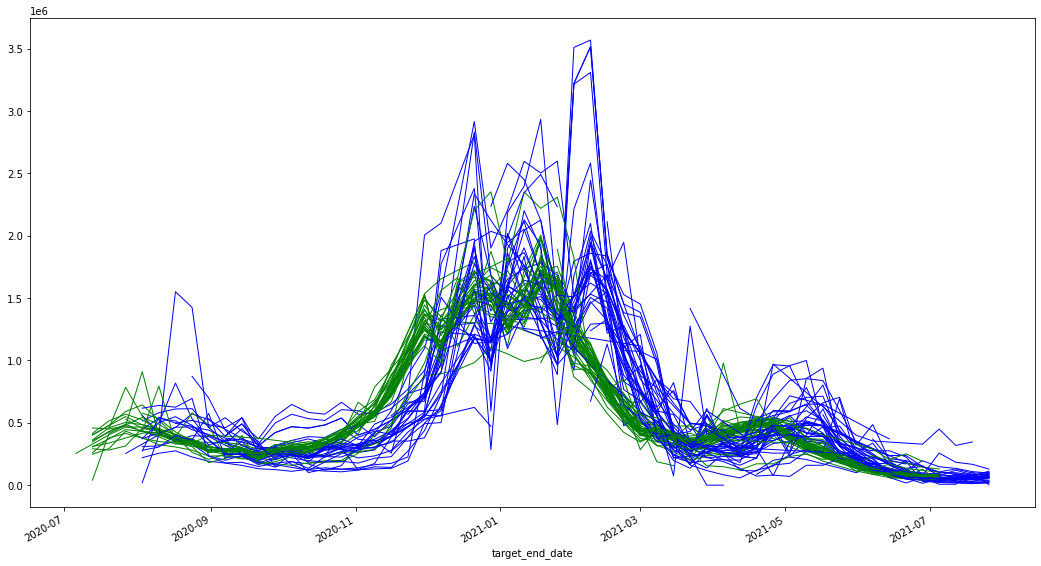

In [7]:
models = frame["Model"].unique()
fig, ax = plt.subplots()

for model in models:
    if model == "DDS-NBDS":
        continue
    model_frame = frame[(frame["Model"]==model) & (frame["target"] == "4 wk ahead inc case")][["target_end_date", "point"]]
    model_frame.target_end_date=pd.to_datetime(model_frame.target_end_date)
    model_frame = model_frame.set_index("target_end_date", drop=True)
    model_frame.sort_index()["point"].plot(figsize=(18,10),ax=ax, linewidth=1,  label='_nolegend_', color='b')
    
    model_frame = frame[(frame["Model"]==model) & (frame["target"] == "1 wk ahead inc case")][["target_end_date", "point"]]
    model_frame.target_end_date=pd.to_datetime(model_frame.target_end_date)
    model_frame = model_frame.set_index("target_end_date", drop=True)
    model_frame.sort_index()["point"].plot(figsize=(18,10),ax=ax, linewidth=1,  label='_nolegend_', color='g')

# 1 Wk and 4 Wk Predictions against Forecast Date

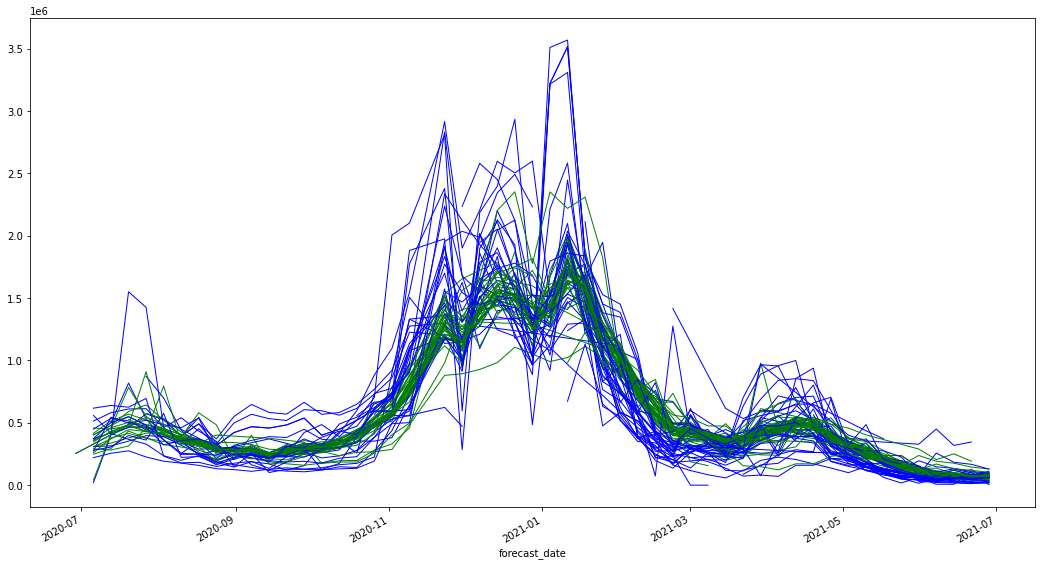

In [37]:
models = frame["Model"].unique()
fig, ax = plt.subplots()

for model in models:
    if model == "DDS-NBDS":
        continue
    model_frame = frame[(frame["Model"]==model) & (frame["target"] == "4 wk ahead inc case")][["forecast_date", "point"]]
    model_frame.forecast_date=pd.to_datetime(model_frame.forecast_date)
    model_frame = model_frame.set_index("forecast_date", drop=True)
    model_frame.sort_index()["point"].plot(figsize=(18,10),ax=ax, linewidth=1,  label='_nolegend_', color='b')
    
    model_frame = frame[(frame["Model"]==model) & (frame["target"] == "1 wk ahead inc case")][["forecast_date", "point"]]
    model_frame.forecast_date=pd.to_datetime(model_frame.forecast_date)
    model_frame = model_frame.set_index("forecast_date", drop=True)
    model_frame.sort_index()["point"].plot(figsize=(18,10),ax=ax, linewidth=1,  label='_nolegend_', color='g')

# MAE b/w 1 Wk and 4 Wk Predictions for each Forecast Date

In [ ]:
mean_avg_error = {}
models = frame["Model"].unique()
for model in models:
    if model == "DDS-NBDS":
        continue
    four_week_frame = frame[(frame["Model"]==model) & (frame["target"] == "4 wk ahead inc case")][["forecast_date", "point"]].set_index("forecast_date", drop=True)
    one_week_frame = frame[(frame["Model"]==model) & (frame["target"] == "1 wk ahead inc case")][["forecast_date", "point"]].set_index("forecast_date", drop=True)
    compare_df = one_week_frame.loc[four_week_frame.index]
    compare_df["diff"] = (abs(four_week_frame["point"] - one_week_frame["point"]) / one_week_frame["point"])*100
    mean_avg_error[model] = compare_df["diff"].mean()
    

In [36]:
for c, w in enumerate(sorted(mean_avg_error, key=mean_avg_error.get, reverse=False)):
    print(f'{c+1}. {w} {"%.2f" % mean_avg_error[w]}%')

1. COVIDhub-baseline 0.00%
2. CEID-Walk 2.00%
3. IowaStateLW-STEM 9.92%
4. SigSci-TS 11.33%
5. IBF-TimeSeries 11.85%
6. MIT-Cassandra 14.42%
7. IQVIA_ACOE-STAN 14.92%
8. QJHong-Encounter 15.24%
9. LNQ-ens1 16.00%
10. COVIDhub-ensemble 16.22%
11. JHU_CSSE-DECOM 17.28%
12. FDANIHASU-Sweight 17.71%
13. Microsoft-DeepSTIA 17.93%
14. UCF-AEM 18.57%
15. USACE-ERDC_SEIR 19.66%
16. CU-scenario_low 22.45%
17. USC-SI_kJalpha_RF 22.78%
18. JHU_IDD-CovidSP 23.19%
19. JCB-PRM 24.47%
20. IEM_MED-CovidProject 24.80%
21. MSRA-DeepST 24.87%
22. UCLA-SuEIR 25.35%
23. LANL-GrowthRate 25.57%
24. BPagano-RtDriven 25.66%
25. TTU-squider 26.51%
26. UMich-RidgeTfReg 26.53%
27. USC-SI_kJalpha 27.62%
28. UVA-Ensemble 27.67%
29. COVIDhub-trained_ensemble 27.77%
30. JHUAPL-Bucky 28.53%
31. UpstateSU-GRU 28.99%
32. CU-select 29.54%
33. KITmetricslab-select_ensemble 32.26%
34. Covid19Sim-Simulator 32.32%
35. CU-scenario_mid 32.34%
36. Columbia_UNC-SurvCon 32.82%
37. CovidAnalytics-DELPHI 34.08%
38. Karlen-pypm 36.6

In [26]:
abs(four_week_frame.loc['2021-04-26'].point -one_week_frame.loc['2021-04-26'].point)/one_week_frame.loc['2021-04-26'].point

0.12913987131137217